***Importing Neccesary Libraries***

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

***Dataset***

In [3]:
alchol=pd.read_csv(r"C:\Users\akash\Downloads\Alcohol_Sales.csv")
alchol.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


Problem Staement : we need to forecast Alcohol_Sales for next 12 months in 02/2019 to 01/2020.

In [4]:
alchol.tail()

,DATE,S4248SM144NCEN
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504
324,2019-01-01,10718


In [5]:
alchol.shape

(325, 2)

In [6]:
alchol.rename(columns={'S4248SM144NCEN':'alcholsales'},inplace=True)

In [7]:
alchol.info()                                     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DATE         325 non-null    object
 1   alcholsales  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [8]:
alchol.isnull().sum()                                   # Checking null values

DATE           0
alcholsales    0
dtype: int64

In [9]:
alchol.DATE=pd.to_datetime(alchol.DATE,infer_datetime_format = True)    # convert datatype of 'DATE' column (object to datetime)

In [10]:
alchol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         325 non-null    datetime64[ns]
 1   alcholsales  325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [11]:
# Time series should be univariate series but we have two columns.so we need to convert DATE column in index. 

In [12]:
alchol=alchol.set_index(['DATE'])

In [13]:
alchol.shape

(325, 1)

***Checking Stationarity***

In [15]:
import matplotlib.pyplot as plt

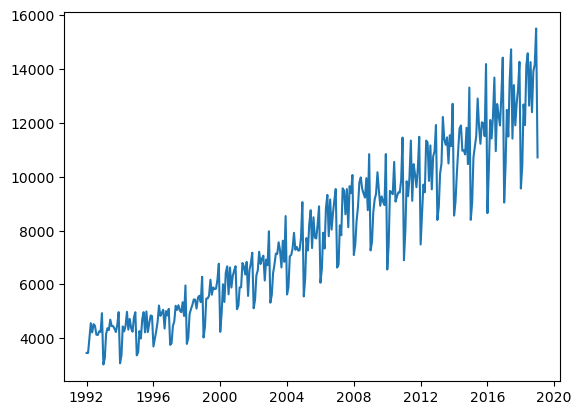

In [16]:
plt.plot(alchol)

In [17]:
# This time series is not Stationary and we need to make it Stationary. 
# To make Stationary we use differencing Method.

In [18]:
alchol.diff().head()

,alcholsales
DATE,
1992-01-01,NaN
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0


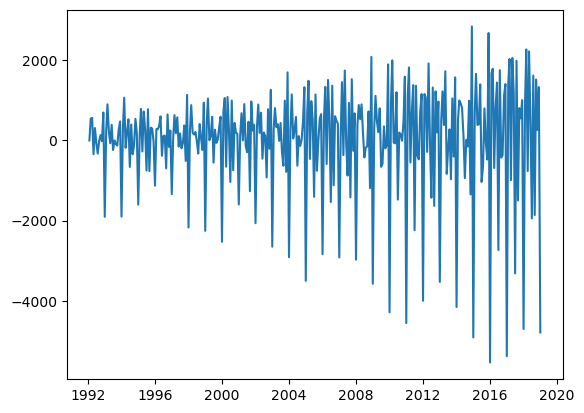

In [19]:
plt.plot(alchol.diff())

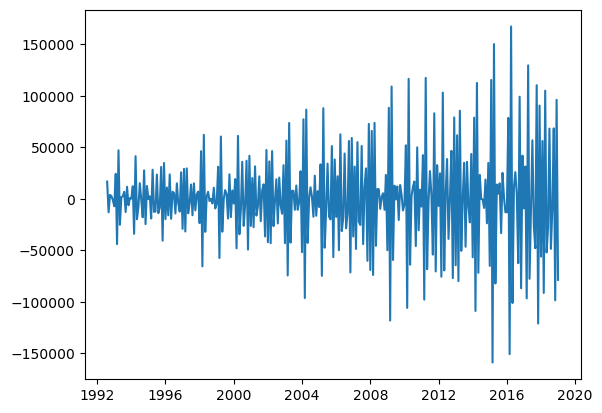

In [20]:
plt.plot(alchol.diff().diff().diff().diff().diff().diff().diff())

In [21]:
# Even after so many levels of differencing the series does not get Stationary.
# Whenever we will face this problem then we need to take log of the data.

In [22]:
alchol_log=np.log(alchol)

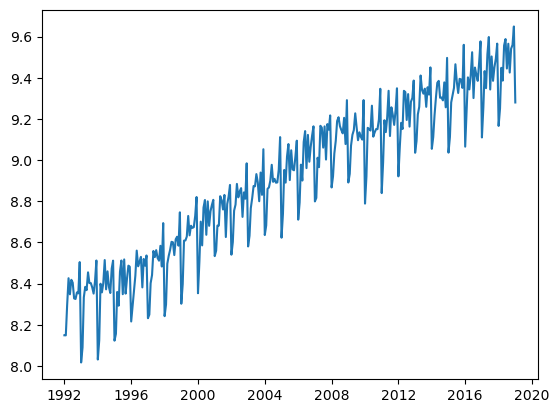

In [23]:
plt.plot(alchol_log)

In [24]:
# This time series is not Stationary and we need to make it Stationary.   (variance is slightly constant only)
# To make Stationary we use differencing Method.


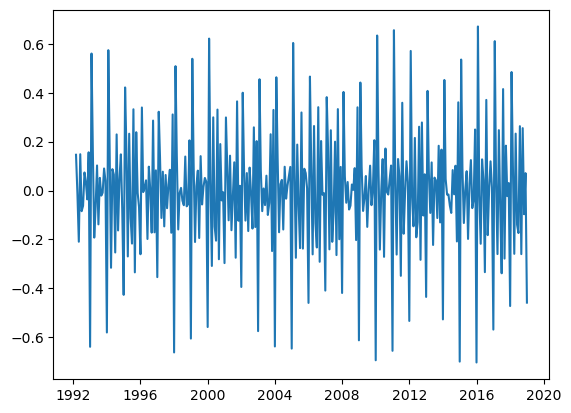

In [25]:
plt.plot(alchol_log.diff().diff())

In [26]:
# This is Stationary series after doing two level of differencing so d=2.
# when we do the forecast the values would also be in log.
# for this issue we need to take the anti log to get the forecated values in original scale.

In [27]:
# So here we have the value of d=2
# to build the model we need to have the three values (p=?,d=1,q=?)

In [28]:
# To find the value of p & q we need to plot the graphs i.e ACF and PACF graphs.

***ACF Graph (Auto Corelation Function) :***

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

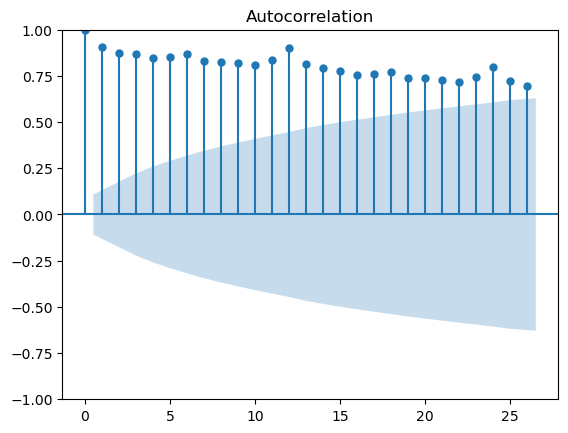

In [30]:
plot_acf(alchol_log);

***PACF Graph (Partial Auto Corelation Function) :***

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


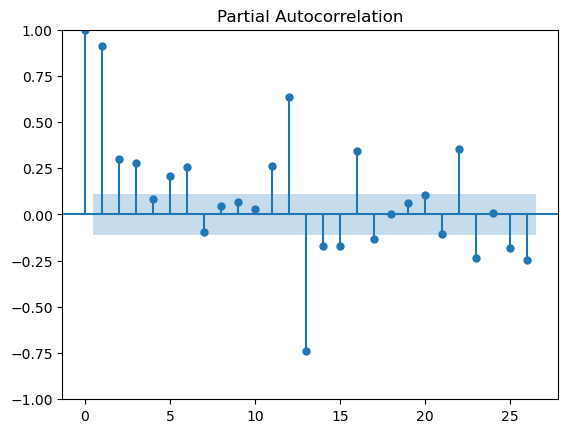

In [31]:
plot_pacf(alchol_log);

In [32]:
# PACF declines sharply and ACF declines slowly so its AR(7) process. why 7? because after 7 lags we are getting correlation 0.
# By this graphs we got the values as p=7,q=0

# SARIMAX Model

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [34]:
result=seasonal_decompose(alchol_log)     #To check seasonality.

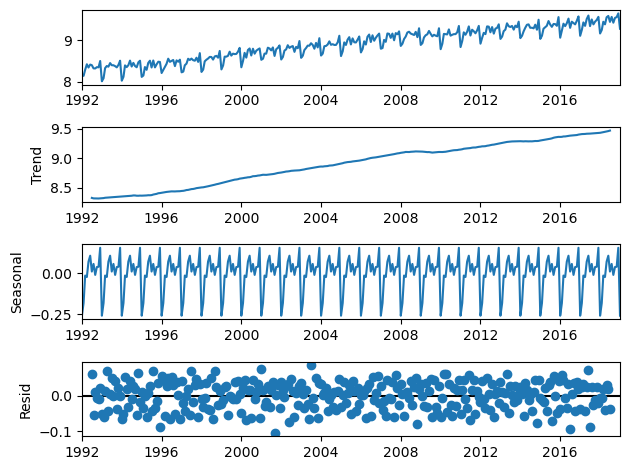

In [35]:
result.plot();

In [36]:
# here we can see that there is uptrend and seasonal pattern in our data .
# first of all we need to use auto_arima , To use SARIMA and SARIMAX.

In [37]:
auto_arima(alchol_log,seasonal=True,m=12) 

# 'm' is time period(we forecast for next 12 months)  
# seasonal = True means (seasonaltiy present in our data).

ARIMA(order=(4, 1, 3), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [38]:
# Whatever values we get from autoarima we need to pass them in SARIMAX model.

In [39]:
alchol_sarimax = SARIMAX(alchol_log,order = (4, 1, 3),seasonal_order=(2, 0, 2, 12))

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [40]:
alchol_model = alchol_sarimax.fit()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
pred_values=alchol_model.predict(start=325,end=336)             
pred_values

# start and end is for next 12 months which we will forecast  
# we have 325 records but indexing starts from 0 hence we have considering 324 records.                                       
# 325 record is our next year first month(feb)i.e 2019-02-01
# 336 record is our next year last month(jan) i.e 2020-01-01

2019-02-01    9.350870
2019-03-01    9.492322
2019-04-01    9.499284
2019-05-01    9.592180
2019-06-01    9.632090
2019-07-01    9.511689
2019-08-01    9.581218
2019-09-01    9.504888
2019-10-01    9.590625
2019-11-01    9.576950
2019-12-01    9.705681
2020-01-01    9.310660
Freq: MS, Name: predicted_mean, dtype: float64

In [42]:
# forecasted values in log.
# for this issue we need to take the anti log to get the forecated values in original scale.

In [43]:
pred_values1=np.exp(pred_values)          # antilog using exponential.
pred_values1

2019-02-01    11508.832939
2019-03-01    13257.547304
2019-04-01    13350.170016
2019-05-01    14649.765524
2019-06-01    15246.263120
2019-07-01    13516.801470
2019-08-01    14490.059223
2019-09-01    13425.189606
2019-10-01    14627.013200
2019-11-01    14428.344221
2019-12-01    16410.567857
2020-01-01    11055.239074
Freq: MS, Name: predicted_mean, dtype: float64

***Graph for alchol_log & pred_values***

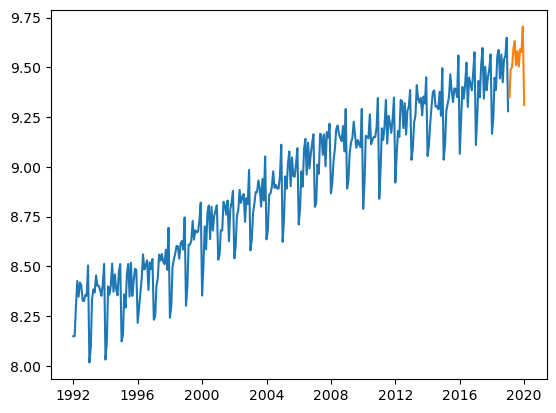

In [44]:
plt.plot(alchol_log)
plt.plot(pred_values)

In [45]:
# whatever we build the time series model is on right track.
# predicted values also show same pattern like past values.
# predicted values in orange color.

# This graph is for log values.

In [46]:
pred_values1=np.exp(pred_values).round()         # antilog using exponential.
pred_values1

2019-02-01    11509.0
2019-03-01    13258.0
2019-04-01    13350.0
2019-05-01    14650.0
2019-06-01    15246.0
2019-07-01    13517.0
2019-08-01    14490.0
2019-09-01    13425.0
2019-10-01    14627.0
2019-11-01    14428.0
2019-12-01    16411.0
2020-01-01    11055.0
Freq: MS, Name: predicted_mean, dtype: float64

In [47]:
df=pd.DataFrame()
df['Predicted']=pred_values1
df['DATE']=['2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01']

In [48]:
df.DATE=pd.to_datetime(df.DATE,infer_datetime_format = True)

In [49]:
df=df.set_index(['DATE'])

In [50]:
df

,Predicted
DATE,
2019-02-01,11509.0
2019-03-01,13258.0
2019-04-01,13350.0
2019-05-01,14650.0
2019-06-01,15246.0
2019-07-01,13517.0
2019-08-01,14490.0
2019-09-01,13425.0
2019-10-01,14627.0


***Graph for Actual & Predictyed Values***

<AxesSubplot:xlabel='DATE'>

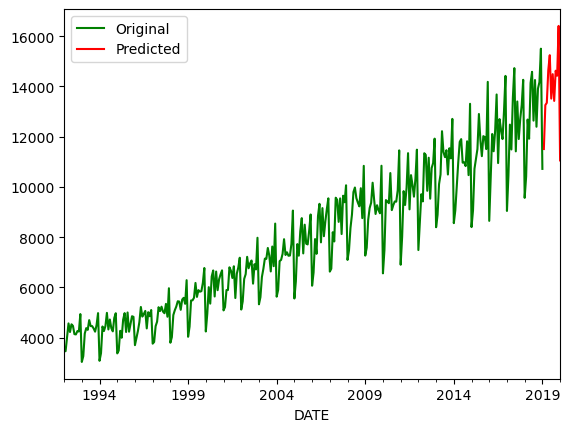

In [51]:
alchol['alcholsales'].plot(legend=True,label='Original',color='green')
df['Predicted'].plot(legend=True,label='Predicted',color='red')


Conclusion : This graph is for orignal values
whatever we build the time series model is on right track.
predicted values also show same pattern like past values.
predicted values in orange color.